
# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset


## Descriptive Analytics for Numerical Columns

In [1]:
import pandas as pd

In [12]:
df = pd.read_csv('/content/sales_data_with_discounts.csv')

In [13]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
df.index

RangeIndex(start=0, stop=450, step=1)

In [5]:
df.columns

Index(['Date', 'Day', 'SKU', 'City', 'Volume', 'BU', 'Brand', 'Model',
       'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')

In [6]:
df.shape

(450, 13)

In [7]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


### mean, median, mode, and standard deviation

In [8]:
df.mean(numeric_only=True)

,0
Volume,5.066667
Avg Price,10453.433333
Total Sales Value,33812.835556
Discount Rate (%),15.155242
Discount Amount,3346.499424
Net Sales Value,30466.336131


In [9]:
df.mode(numeric_only=True)

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,3.0,400.0,24300.0,5.007822,69.177942,326.974801
1,NaN,450.0,NaN,5.055218,73.025199,330.822058
2,NaN,500.0,NaN,5.059801,93.649161,466.350839
3,NaN,1300.0,NaN,5.072124,94.682735,485.317265
4,NaN,8100.0,NaN,5.084108,102.705757,496.607104
...,...,...,...,...,...,...
445,NaN,NaN,NaN,19.940610,17900.983733,162603.186379
446,NaN,NaN,NaN,19.965340,21153.498820,163915.971000
447,NaN,NaN,NaN,19.976879,21496.675367,163967.080070
448,NaN,NaN,NaN,19.982257,25328.224204,166263.161348


In [10]:
df.median(numeric_only=True)

,0
Volume,4.000000
Avg Price,1450.000000
Total Sales Value,5700.000000
Discount Rate (%),16.577766
Discount Amount,988.933733
Net Sales Value,4677.788059


In [11]:
df.std(numeric_only=True)

,0
Volume,4.231602
Avg Price,18079.904840
Total Sales Value,50535.074173
Discount Rate (%),4.220602
Discount Amount,4509.902963
Net Sales Value,46358.656624


## Data Visualization

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
%matplotlib inline
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

In [21]:
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

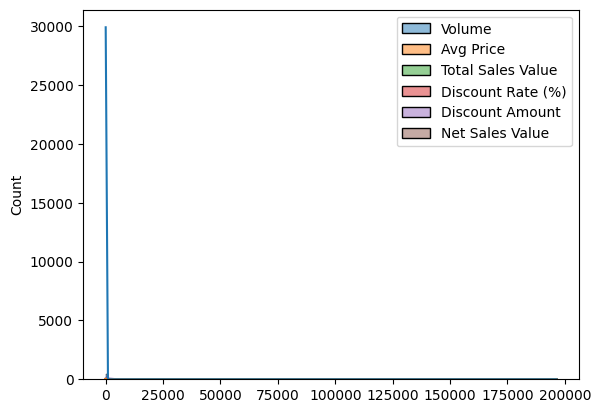

In [24]:
sns.histplot(df[numerical_cols],kde=True)
col=numerical_cols

### Histograms:

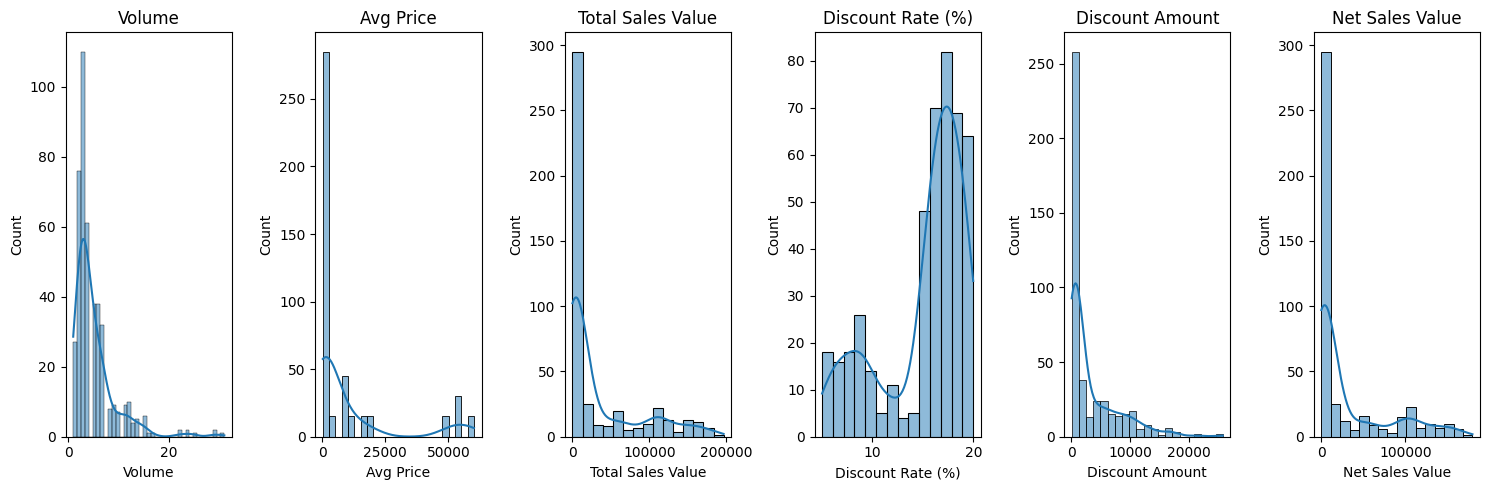

In [25]:
plt.figure(figsize=(15,5))
for i,col in enumerate(numerical_cols):
  plt.subplot(1,len(numerical_cols), i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
  plt.tight_layout()

plt.show()

### Boxplots:

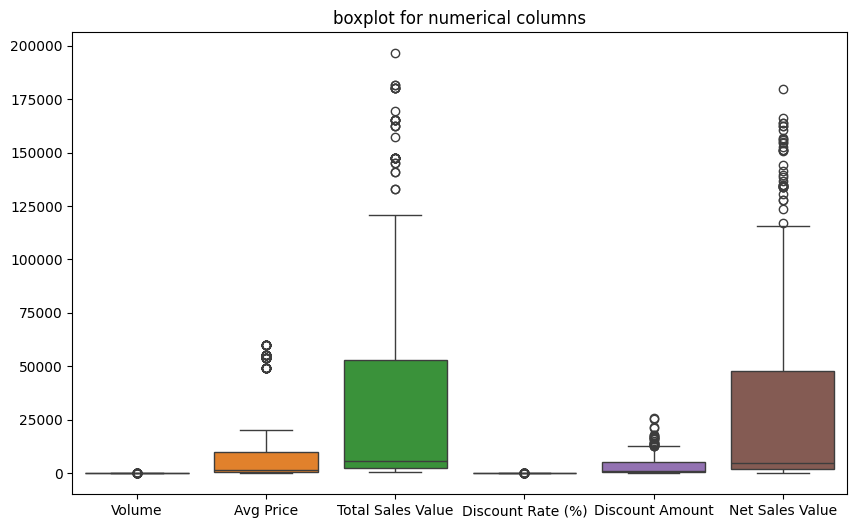

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_cols])
plt.title("boxplot for numerical columns")
plt.show()

### Bar Chart Analysis for Categorical Column:

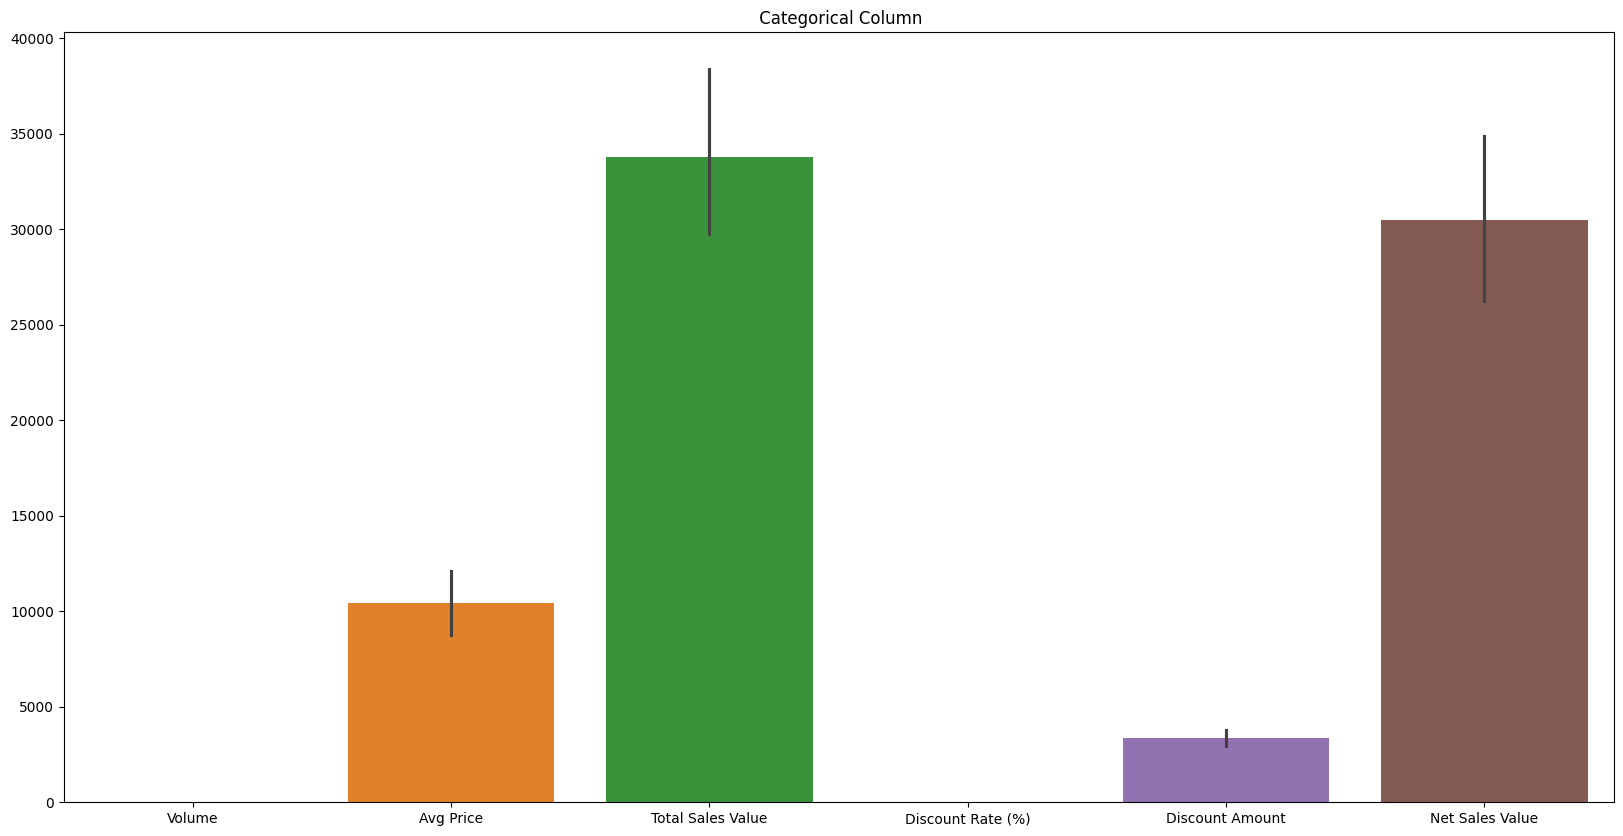

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(data=df)
plt.title(" Categorical Column")
plt.show()

## Standardization of Numerical Variables

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

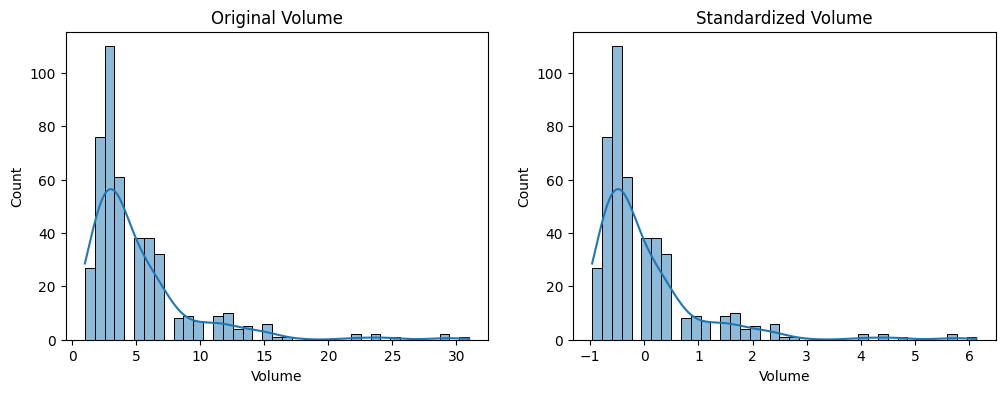

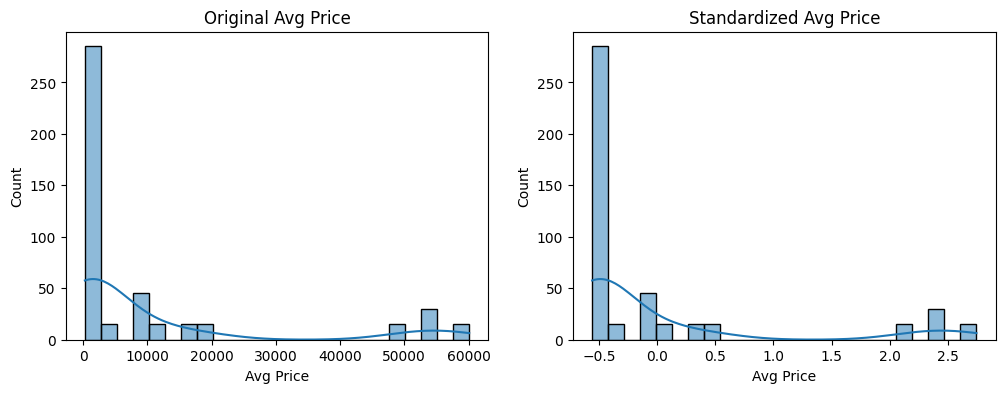

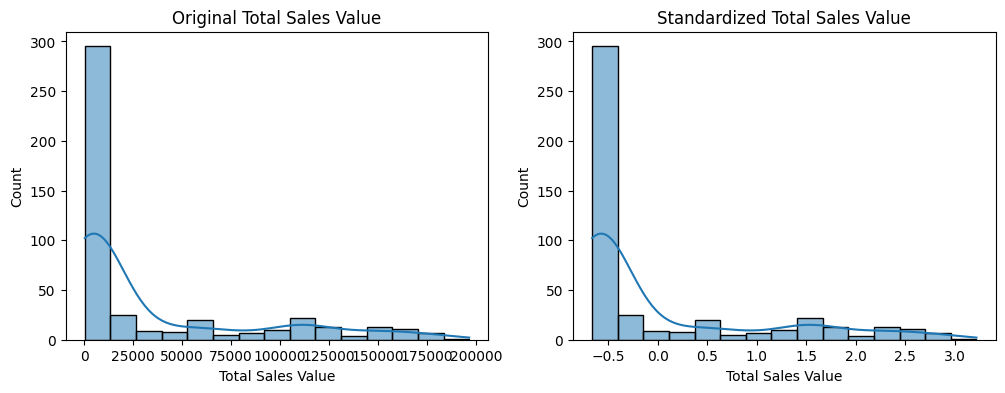

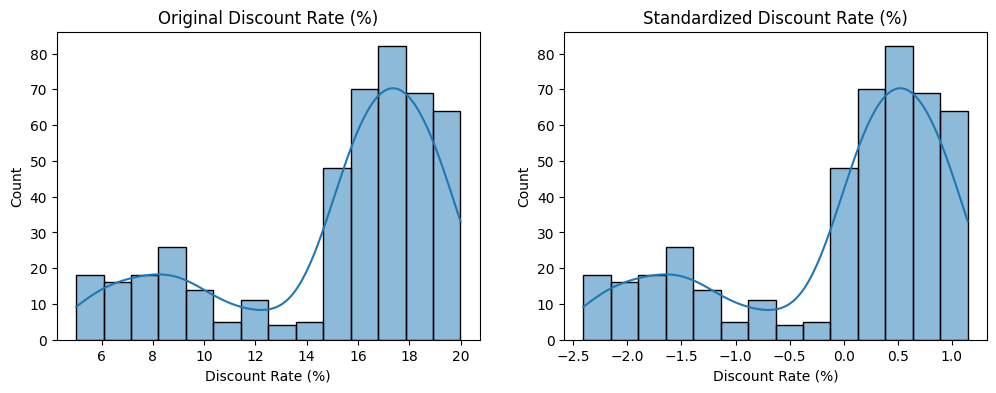

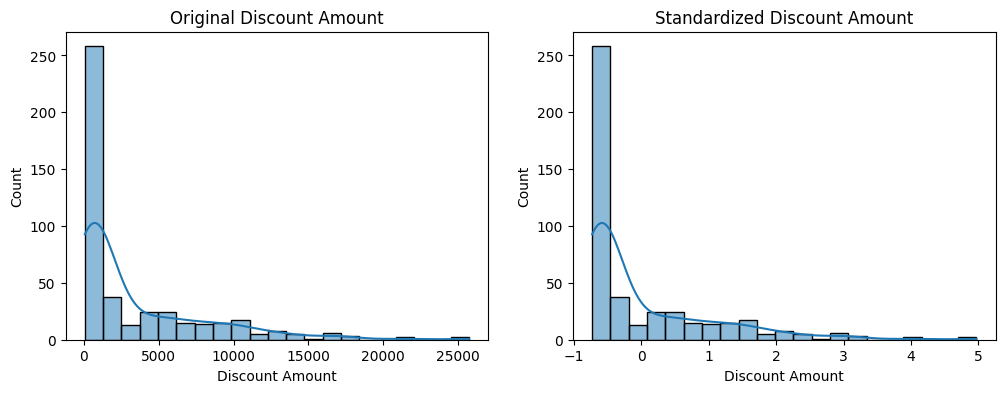

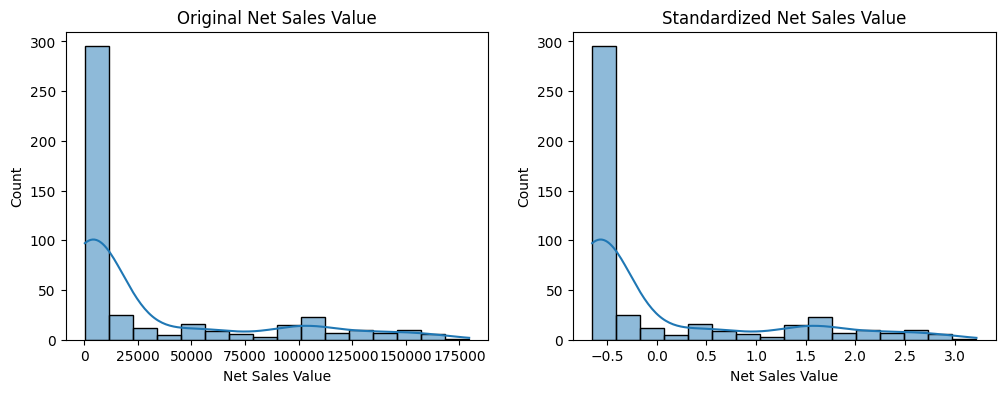

In [29]:
for col in numerical_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=ax[0]).set_title(f'Original {col}')
    sns.histplot(df_scaled[col], kde=True, ax=ax[1]).set_title(f'Standardized {col}')
    plt.show()

## Conversion of Categorical Data into Dummy Variables

In [30]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
